In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [19]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


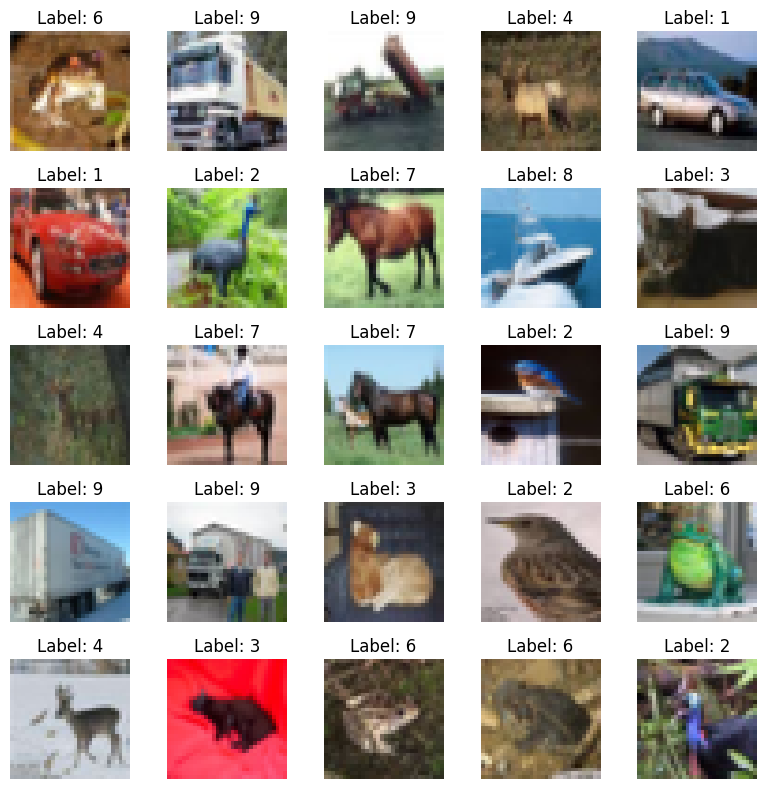

In [20]:
plt.figure(figsize=(8, 8))

for index in range(25):
    plt.subplot(5, 5, index + 1)
    plt.imshow(train_images[index])
    plt.title(f"Label: {train_labels[index][0]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [21]:
augmentation_layer = keras.Sequential([
    layers.RandomFlip(mode="horizontal"),
    layers.RandomRotation(factor=0.1),
    layers.RandomZoom(height_factor=0.1, width_factor=0.1)
])

In [22]:
#augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [23]:
cnn_model = models.Sequential()

# Data preprocessing
cnn_model.add(augmentation_layer)
cnn_model.add(layers.Rescaling(1./255))

# Convolutional Block 1
cnn_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
cnn_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
cnn_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation="relu"))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation="softmax"))

- Compile
- fit
- evaluate
- save

In [24]:
cnn_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [25]:
early_stop_callback = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

training_history = cnn_model.fit(
    train_images,
    train_labels,
    epochs=15,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop_callback]
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2920 - loss: 1.8897 - val_accuracy: 0.4753 - val_loss: 1.4890
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4674 - loss: 1.4718 - val_accuracy: 0.5373 - val_loss: 1.3160
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5196 - loss: 1.3360 - val_accuracy: 0.5917 - val_loss: 1.1565
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5539 - loss: 1.2580 - val_accuracy: 0.6201 - val_loss: 1.0715
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5719 - loss: 1.2062 - val_accuracy: 0.6182 - val_loss: 1.0756
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5939 - loss: 1.1470 - val_accuracy: 0.6315 - val_loss: 1.0415
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6109 - loss: 1.1083 - val_accuracy: 0.6504 - val_loss: 0.9979
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6182 - loss: 1

In [26]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

print("Final Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7110 - loss: 0.8378
Final Test Accuracy: 0.7062000036239624


In [27]:
cnn_model.save("cifar10_classification_model.keras")

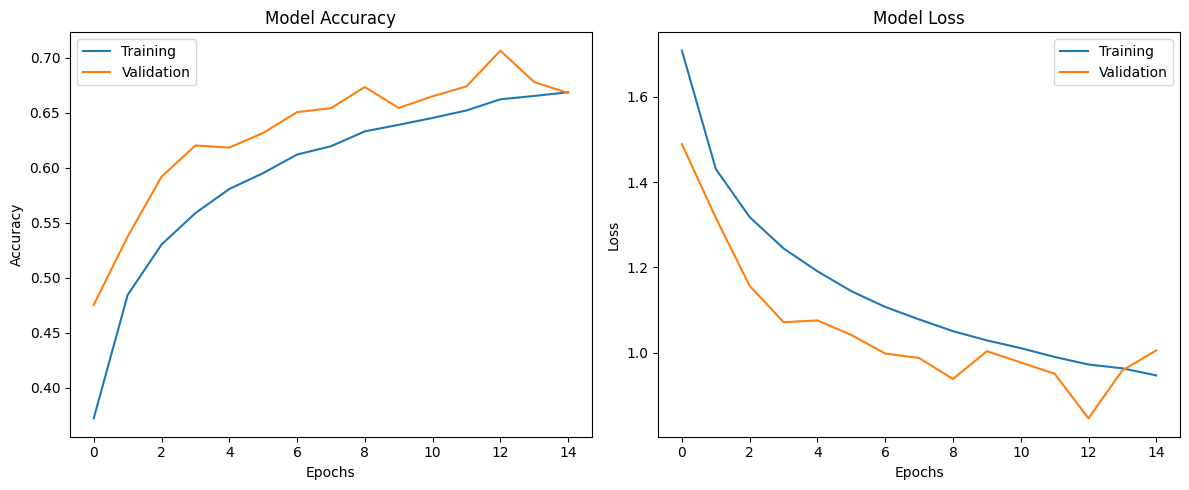

In [28]:
history_data = training_history.history

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_data["accuracy"])
plt.plot(history_data["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_data["loss"])
plt.plot(history_data["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])

plt.tight_layout()
plt.show()